In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import bs4
from bs4 import BeautifulSoup
import requests

In [2]:
url="https://www.worlddata.info/cost-of-living.php"
page=requests.get(url)
page

<Response [200]>

In [3]:
soup=BeautifulSoup(page.text)
soup

<!DOCTYPE HTML>
<html lang="en"><head><meta charset="utf-8"/><title>Cost of living in a global comparison</title><link href="https://cdn.worlddata.info" rel="preconnect"/><link href="https://cdn.worlddata.info" rel="dns-prefetch"/><link href="https://www.laenderdaten.info/lebenshaltungskosten.php" hreflang="de" rel="alternate"/><link href="https://www.worlddata.info/cost-of-living.php" hreflang="en" rel="alternate"/><link href="https://www.datosmundial.com/costo-de-vida.php" hreflang="es" rel="alternate"/><link href="https://www.dadosmundiais.com/custo-de-vida.php" hreflang="pt-BR" rel="alternate"/><link href="https://www.donneesmondiales.com/cout-vie.php" hreflang="fr" rel="alternate"/><link href="https://www.worlddata.info/cost-of-living.php" id="canonical" rel="canonical"/><meta content="International ranking of the cost of living and purchasing power in 175 countries compared to the US. Differences in price and quality." name="description"/><meta content="index,follow,max-image-pre

In [4]:
table = soup.find("table", class_="std100")
table

<table class="std100 hover tabsort sticky" id="table"><tr class="no-sort"><th class="left">Rank</th><th class="left">Country/Region</th><th class="right">Cost index</th><th class="right">Ø Monthly income</th><th class="right">Purchasing power index</th></tr><tr><td>1</td><td><a class="fl_am fl_BMU" href="/america/bermuda/index.php">Bermuda</a> *</td><td>144.1</td><td>12,096 USD</td><td>120.6</td></tr><tr><td>2</td><td><a class="fl_am fl_CYM" href="/america/cayman-islands/index.php">Cayman Islands</a> *</td><td>140.1</td><td>6,172 USD</td><td>63.3</td></tr><tr><td>3</td><td><a class="fl_am fl_TCA" href="/america/turks-and-caicos/index.php">Turks and Caicos Islands</a> *</td><td>131.7</td><td>3,063 USD</td><td>33.4</td></tr><tr><td>4</td><td><a class="fl_eu fl_CHE" href="/europe/switzerland/index.php">Switzerland</a></td><td>125.8</td><td>7,935 USD</td><td>90.7</td></tr><tr><td>5</td><td><a class="fl_am fl_BRB" href="/america/barbados/index.php">Barbados</a></td><td>124.4</td><td>2,095 U

In [5]:
rows = table.find_all("tr")
rows

[<tr class="no-sort"><th class="left">Rank</th><th class="left">Country/Region</th><th class="right">Cost index</th><th class="right">Ø Monthly income</th><th class="right">Purchasing power index</th></tr>,
 <tr><td>1</td><td><a class="fl_am fl_BMU" href="/america/bermuda/index.php">Bermuda</a> *</td><td>144.1</td><td>12,096 USD</td><td>120.6</td></tr>,
 <tr><td>2</td><td><a class="fl_am fl_CYM" href="/america/cayman-islands/index.php">Cayman Islands</a> *</td><td>140.1</td><td>6,172 USD</td><td>63.3</td></tr>,
 <tr><td>3</td><td><a class="fl_am fl_TCA" href="/america/turks-and-caicos/index.php">Turks and Caicos Islands</a> *</td><td>131.7</td><td>3,063 USD</td><td>33.4</td></tr>,
 <tr><td>4</td><td><a class="fl_eu fl_CHE" href="/europe/switzerland/index.php">Switzerland</a></td><td>125.8</td><td>7,935 USD</td><td>90.7</td></tr>,
 <tr><td>5</td><td><a class="fl_am fl_BRB" href="/america/barbados/index.php">Barbados</a></td><td>124.4</td><td>2,095 USD</td><td>24.2</td></tr>,
 <tr><td>6<

In [6]:
data = []

for row in rows[1:]:  # skip header
    cols = row.find_all("td")
    if len(cols) >= 4:
        data.append({
            "Rank": cols[0].text.strip(),
            "Country": cols[1].text.strip(),
            "Cost_of_Living_Index": cols[2].text.strip(),
            "Monthly_Income": cols[3].text.strip(),
            "Purchasing_Power_Index": cols[4].text.strip()
        })
print(data)

[{'Rank': '1', 'Country': 'Bermuda *', 'Cost_of_Living_Index': '144.1', 'Monthly_Income': '12,096 USD', 'Purchasing_Power_Index': '120.6'}, {'Rank': '2', 'Country': 'Cayman Islands *', 'Cost_of_Living_Index': '140.1', 'Monthly_Income': '6,172 USD', 'Purchasing_Power_Index': '63.3'}, {'Rank': '3', 'Country': 'Turks and Caicos Islands *', 'Cost_of_Living_Index': '131.7', 'Monthly_Income': '3,063 USD', 'Purchasing_Power_Index': '33.4'}, {'Rank': '4', 'Country': 'Switzerland', 'Cost_of_Living_Index': '125.8', 'Monthly_Income': '7,935 USD', 'Purchasing_Power_Index': '90.7'}, {'Rank': '5', 'Country': 'Barbados', 'Cost_of_Living_Index': '124.4', 'Monthly_Income': '2,095 USD', 'Purchasing_Power_Index': '24.2'}, {'Rank': '6', 'Country': 'Iceland', 'Cost_of_Living_Index': '116.7', 'Monthly_Income': '6,850 USD', 'Purchasing_Power_Index': '84.4'}, {'Rank': '7', 'Country': 'Bahamas', 'Cost_of_Living_Index': '110.7', 'Monthly_Income': '3,085 USD', 'Purchasing_Power_Index': '40.1'}, {'Rank': '8', 'Co

In [7]:
Cost_Of_Living = pd.DataFrame(data)
Cost_Of_Living

,Rank,Country,Cost_of_Living_Index,Monthly_Income,Purchasing_Power_Index
0,1,Bermuda *,144.1,"12,096 USD",120.6
1,2,Cayman Islands *,140.1,"6,172 USD",63.3
2,3,Turks and Caicos Islands *,131.7,"3,063 USD",33.4
3,4,Switzerland,125.8,"7,935 USD",90.7
4,5,Barbados,124.4,"2,095 USD",24.2
...,...,...,...,...,...
83,170,Myanmar,23.9,101 USD,6.1
84,171,India,23.8,221 USD,13.3
85,172,Pakistan,23.3,119 USD,7.4
86,173,Palestine,21.4,226 USD,15.2


# **Data Cleaning**

In [8]:
Cost_Of_Living.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    88 non-null     object
 1   Country                 88 non-null     object
 2   Cost_of_Living_Index    88 non-null     object
 3   Monthly_Income          88 non-null     object
 4   Purchasing_Power_Index  88 non-null     object
dtypes: object(5)
memory usage: 3.6+ KB


In [9]:
Cost_Of_Living.isnull().sum()

,0
Rank,0
Country,0
Cost_of_Living_Index,0
Monthly_Income,0
Purchasing_Power_Index,0


In [10]:
Cost_Of_Living["Country"] = Cost_Of_Living["Country"].str.replace("*", "", regex=False).str.strip()

In [11]:
Cost_Of_Living

,Rank,Country,Cost_of_Living_Index,Monthly_Income,Purchasing_Power_Index
0,1,Bermuda,144.1,"12,096 USD",120.6
1,2,Cayman Islands,140.1,"6,172 USD",63.3
2,3,Turks and Caicos Islands,131.7,"3,063 USD",33.4
3,4,Switzerland,125.8,"7,935 USD",90.7
4,5,Barbados,124.4,"2,095 USD",24.2
...,...,...,...,...,...
83,170,Myanmar,23.9,101 USD,6.1
84,171,India,23.8,221 USD,13.3
85,172,Pakistan,23.3,119 USD,7.4
86,173,Palestine,21.4,226 USD,15.2


In [12]:
Cost_Of_Living["Cost_of_Living_Index"].isna().sum()

np.int64(0)

In [13]:
Cost_Of_Living["Cost_of_Living_Index"].value_counts()

,count
Cost_of_Living_Index,
94.7,2
25.0,2
45.7,2
89.9,2
125.8,1
...,...
23.9,1
23.8,1
23.3,1


In [14]:
Cost_Of_Living['Cost_of_Living_Index']=Cost_Of_Living['Cost_of_Living_Index'].astype(float)

In [15]:
Cost_Of_Living['Purchasing_Power_Index']=Cost_Of_Living['Purchasing_Power_Index'].astype(float)

In [16]:
Cost_Of_Living['Rank']=Cost_Of_Living['Rank'].astype(int)

In [17]:
Cost_Of_Living['Monthly_Income'] = Cost_Of_Living['Monthly_Income'].str.replace('USD', '')

In [18]:
Cost_Of_Living['Monthly_Income'] = Cost_Of_Living['Monthly_Income'].astype(str)
Cost_Of_Living['Monthly_Income'] = Cost_Of_Living['Monthly_Income'].str.replace(',', '').astype(int)

In [19]:
Cost_Of_Living.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    88 non-null     int64  
 1   Country                 88 non-null     object 
 2   Cost_of_Living_Index    88 non-null     float64
 3   Monthly_Income          88 non-null     int64  
 4   Purchasing_Power_Index  88 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.6+ KB


In [20]:
Cost_Of_Living.head()

,Rank,Country,Cost_of_Living_Index,Monthly_Income,Purchasing_Power_Index
0,1,Bermuda,144.1,12096,120.6
1,2,Cayman Islands,140.1,6172,63.3
2,3,Turks and Caicos Islands,131.7,3063,33.4
3,4,Switzerland,125.8,7935,90.7
4,5,Barbados,124.4,2095,24.2


# **Data Analysis**

In [21]:
# which are top 10 countries by cost of living
Cost_Of_Living.sort_values('Cost_of_Living_Index', ascending=False).head(10)

,Rank,Country,Cost_of_Living_Index,Monthly_Income,Purchasing_Power_Index
0,1,Bermuda,144.1,12096,120.6
1,2,Cayman Islands,140.1,6172,63.3
2,3,Turks and Caicos Islands,131.7,3063,33.4
3,4,Switzerland,125.8,7935,90.7
4,5,Barbados,124.4,2095,24.2
5,6,Iceland,116.7,6850,84.4
6,7,Bahamas,110.7,3085,40.1
7,8,Vanuatu,107.4,324,4.3
8,9,New Caledonia,105.3,2506,34.2
9,10,Denmark,103.1,6045,84.2


In [26]:
# Which countries have high cost of living but low purchasing power?
Cost_Of_Living.sort_values(
    ['Cost_of_Living_Index', 'Purchasing_Power_Index'],
    ascending=[False, True]
).head(10)

,Rank,Country,Cost_of_Living_Index,Monthly_Income,Purchasing_Power_Index,Income_Cost_Ratio
0,1,Bermuda,144.1,12096,120.6,83.941707
1,2,Cayman Islands,140.1,6172,63.3,44.054247
2,3,Turks and Caicos Islands,131.7,3063,33.4,23.257403
3,4,Switzerland,125.8,7935,90.7,63.076312
4,5,Barbados,124.4,2095,24.2,16.840836
5,6,Iceland,116.7,6850,84.4,58.697515
6,7,Bahamas,110.7,3085,40.1,27.868112
7,8,Vanuatu,107.4,324,4.3,3.016760
8,9,New Caledonia,105.3,2506,34.2,23.798670
9,10,Denmark,103.1,6045,84.2,58.632396


In [27]:
# Which countries offer the best purchasing power relative to cost of living?
Cost_Of_Living['PP_to_Cost_Ratio'] = (
    Cost_Of_Living['Purchasing_Power_Index'] /
    Cost_Of_Living['Cost_of_Living_Index']
)

Cost_Of_Living.sort_values('PP_to_Cost_Ratio', ascending=False).head(10)

,Rank,Country,Cost_of_Living_Index,Monthly_Income,Purchasing_Power_Index,Income_Cost_Ratio,PP_to_Cost_Ratio
72,152,Russia,31.3,1277,58.6,40.798722,1.872204
51,93,Saudi Arabia,50.2,2969,85.0,59.143426,1.693227
81,168,Belarus,25.0,688,39.6,27.520000,1.584000
36,44,Singapore,78.0,6229,114.8,79.858974,1.471795
25,26,Norway,89.4,8181,131.5,91.510067,1.470917
70,150,Malaysia,31.7,971,44.0,30.630915,1.388013
37,48,Hong Kong,74.8,4756,91.3,63.582888,1.220588
15,16,Luxembourg,95.8,7054,105.9,73.632568,1.105428
64,131,Turkey,38.2,1122,42.2,29.371728,1.104712
35,43,Germany,78.3,4591,84.2,58.633461,1.075351


In [28]:
# Which countries fall below average income but above average cost of living?
avg_income = Cost_Of_Living['Monthly_Income'].mean()
avg_cost = Cost_Of_Living['Cost_of_Living_Index'].mean()

Cost_Of_Living[
    (Cost_Of_Living['Monthly_Income'] < avg_income) &
    (Cost_Of_Living['Cost_of_Living_Index'] > avg_cost)
]

,Rank,Country,Cost_of_Living_Index,Monthly_Income,Purchasing_Power_Index,Income_Cost_Ratio,PP_to_Cost_Ratio
4,5,Barbados,124.4,2095,24.2,16.840836,0.194534
7,8,Vanuatu,107.4,324,4.3,3.016760,0.040037
10,11,Virgin Islands,101.0,1161,16.5,11.495050,0.163366
14,15,Palau,99.3,1173,17.0,11.812689,0.171198
16,17,Marshall Islands,95.2,708,10.7,7.436975,0.112395
19,20,Micronesia,92.7,353,5.5,3.807983,0.059331
20,21,French Polynesia,92.4,1994,31.0,21.580087,0.335498
21,22,Solomon Islands,90.2,159,2.5,1.762749,0.027716
24,25,Puerto Rico,89.7,2155,34.5,24.024526,0.384615
33,37,Haiti,81.1,147,2.6,1.812577,0.032059


# **Visualization**

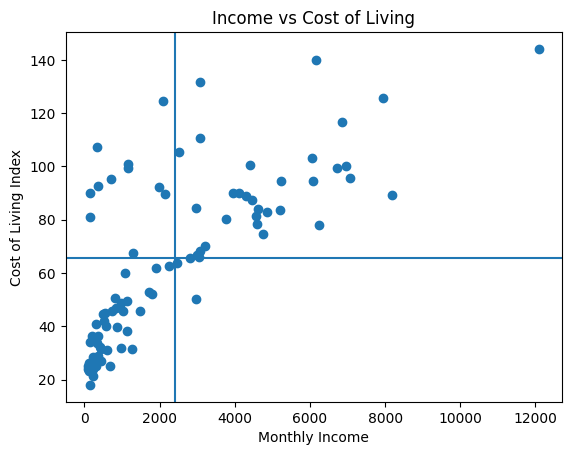

In [30]:
plt.figure()
plt.scatter(
    Cost_Of_Living['Monthly_Income'],
    Cost_Of_Living['Cost_of_Living_Index']
)

# Average reference lines
plt.axvline(avg_income)
plt.axhline(avg_cost)

plt.xlabel('Monthly Income')
plt.ylabel('Cost of Living Index')
plt.title('Income vs Cost of Living')

plt.show()

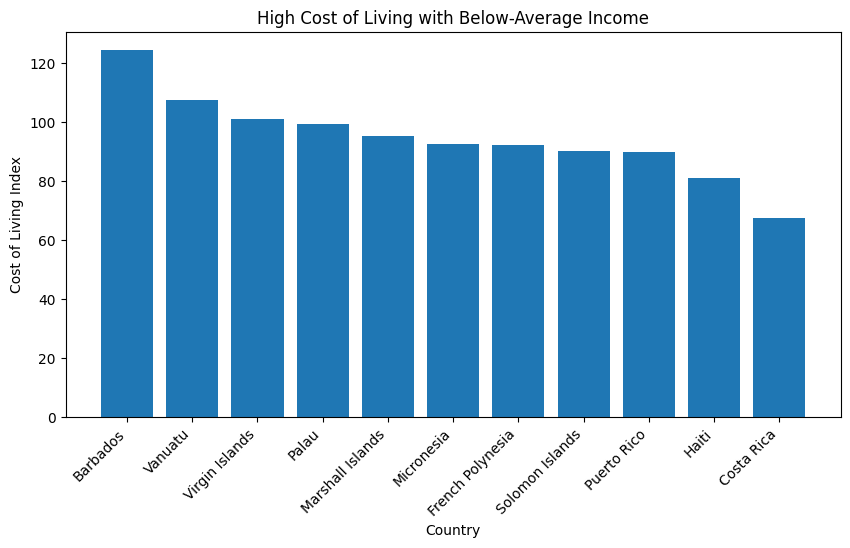

In [35]:
filtered = Cost_Of_Living[
    (Cost_Of_Living['Monthly_Income'] < avg_income) &
    (Cost_Of_Living['Cost_of_Living_Index'] > avg_cost)
]

plt.figure(figsize=(10, 5))
plt.bar(
    filtered['Country'],
    filtered['Cost_of_Living_Index']
)

plt.xticks(rotation=45,ha='right')
plt.xlabel('Country')
plt.ylabel('Cost of Living Index')
plt.title('High Cost of Living with Below-Average Income')

plt.show()

# **Saving CSV file**

In [24]:
Cost_Of_Living.to_csv("Cost_Of_Living Worldwide.csv")

In [25]:
from google.colab import files
files.download("Cost_Of_Living Worldwide.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>